# Tidy3D mode solver

In [1]:
import gdsfactory.simulation.gtidy3d as gt

2022-06-15 17:14:39.456 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.10.3


2022-06-15 17:14:41.329 | INFO     | gdsfactory.simulation.gtidy3d:<module>:52 - Tidy3d '1.4.0' installed at ['/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d']


<Figure size 432x288 with 2 Axes>

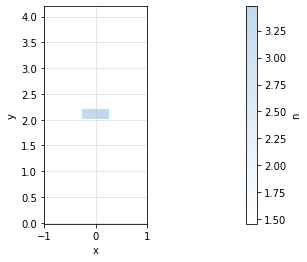

<Figure size 432x288 with 2 Axes>

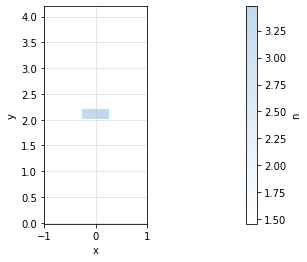

wavelength:1.55, wg_width:0.5, t_wg:0.22, t_slab:0.0, t_box:2.0, t_clad:2.0, ncore:functools.partial( , 'si'), nclad:functools.partial( , 'sio2'), w_sim:2.0, resolution:100, nmodes:4, bend_radius:None

In [2]:
strip = gt.modes.Waveguide(wavelength=1.55, wg_width=0.5, t_wg=0.22, t_slab=0.0)
strip

In [3]:
strip = gt.modes.find_modes(wavelength=1.55, wg_width=0.5, t_wg=0.22, t_slab=0.0)

2022-06-15 17:14:41.652 | INFO     | gdsfactory.simulation.gtidy3d.modes:find_modes:437 - load /home/runner/work/gdsfactory/gdsfactory/gdslib/modes/31e35e6e.pkl waveguide from file cache.


<Figure size 432x288 with 2 Axes>

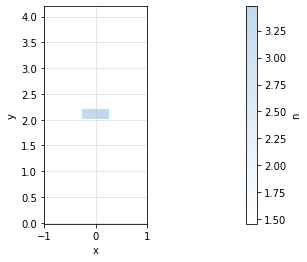

<Figure size 432x288 with 2 Axes>

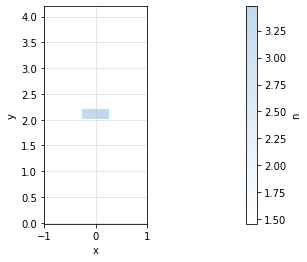

wavelength:1.55, wg_width:0.5, t_wg:0.22, t_slab:0.0, t_box:2.0, t_clad:2.0, ncore:functools.partial( , 'si'), nclad:functools.partial( , 'sio2'), w_sim:2.0, resolution:100, nmodes:4, bend_radius:None

In [4]:
strip

<Figure size 432x288 with 3 Axes>

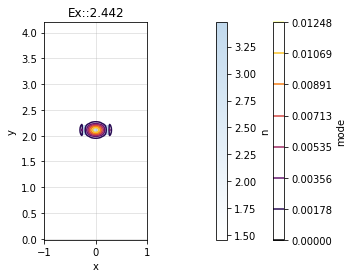

<Figure size 432x288 with 3 Axes>

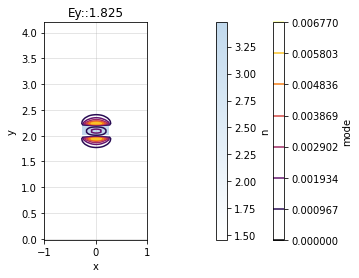

In [5]:
strip.plot_Ex(0)  # TE
strip.plot_Ey(1)  # TM

2022-06-15 17:14:42.533 | INFO     | gdsfactory.simulation.gtidy3d.modes:find_modes:437 - load /home/runner/work/gdsfactory/gdsfactory/gdslib/modes/fc3afded.pkl waveguide from file cache.


<Figure size 432x288 with 2 Axes>

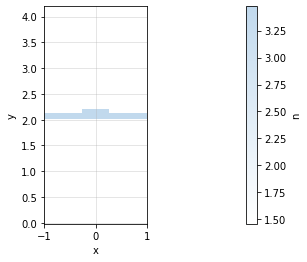

In [6]:
rib = gt.modes.find_modes(wavelength=1.55, wg_width=0.5, t_wg=0.22, t_slab=0.15)
rib.plot_index()

<Figure size 432x288 with 3 Axes>

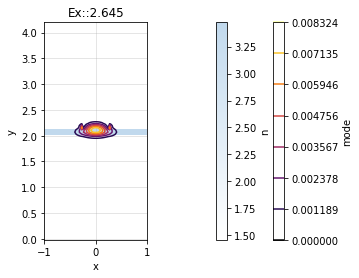

<Figure size 432x288 with 3 Axes>

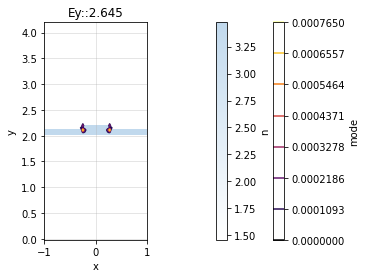

In [7]:
rib.plot_Ex(index=0)
rib.plot_Ey(index=0)

2022-06-15 17:14:43.138 | INFO     | gdsfactory.simulation.gtidy3d.modes:find_modes:437 - load /home/runner/work/gdsfactory/gdsfactory/gdslib/modes/a82e39d0.pkl waveguide from file cache.


<Figure size 432x288 with 2 Axes>

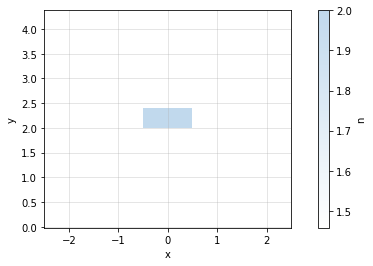

In [8]:
# For nitride we increase the simulation size
nitride = gt.modes.find_modes(
    wavelength=1.55, wg_width=1.0, t_wg=0.4, ncore=2.0, w_sim=5
)
nitride.plot_index()

<Figure size 432x288 with 3 Axes>

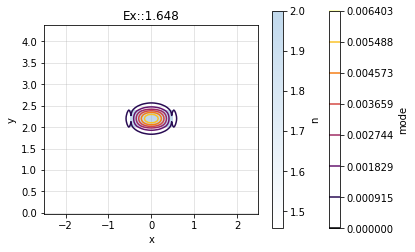

In [9]:
nitride.plot_Ex(index=0)  # TE fundamental

<Figure size 432x288 with 3 Axes>

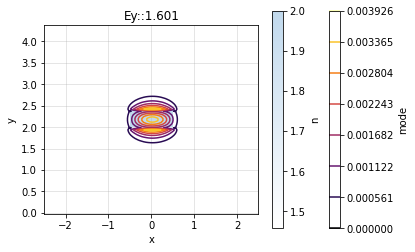

In [10]:
nitride.plot_Ey(index=1)  # TM fundamental

## Bend modes

You can compute bend modes specifying the bend radius.

In [11]:
strip_bend = gt.modes.find_modes(
    wavelength=1.55, wg_width=0.5, t_wg=0.22, t_slab=0.0, bend_radius=3
)

2022-06-15 17:14:43.747 | INFO     | gdsfactory.simulation.gtidy3d.modes:find_modes:437 - load /home/runner/work/gdsfactory/gdsfactory/gdslib/modes/94faf2b4.pkl waveguide from file cache.


<Figure size 432x288 with 3 Axes>

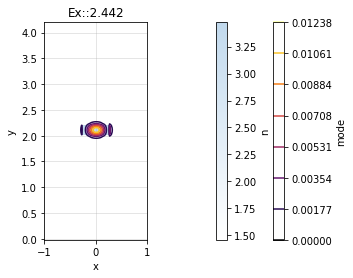

<Figure size 432x288 with 3 Axes>

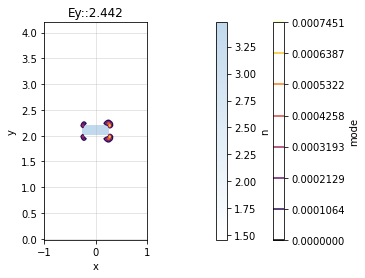

In [12]:
# lets plot the fundamental TE mode
strip_bend.plot_Ex(0)
strip_bend.plot_Ey(0)

<Figure size 432x288 with 3 Axes>

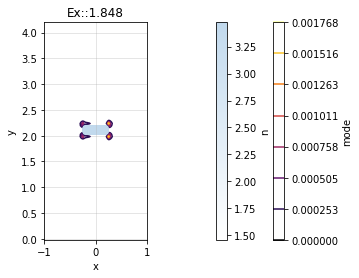

<Figure size 432x288 with 3 Axes>

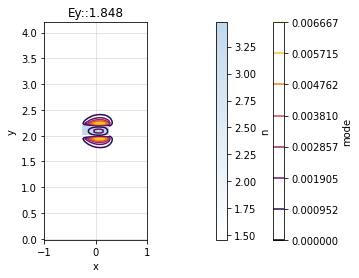

In [13]:
# lets plot the fundamental TM mode
strip_bend.plot_Ex(1)
strip_bend.plot_Ey(1)

## Bend loss

You can also compute the losses coming from the mode missmatch from the bend into a straight waveguide.
To compute the bend loss due to mode missmatch you can calculate the mode overlap of the straight mode and the bent mode.
Because there are two mode missmatch interfaces the total loss due to mode missmatch will be squared (from bend to straight and from straight to bend).


FIXME: we need to fix the overlap integral code.

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/plugins/mode/transforms.py:59: RuntimeWarning: divide by zero encountered in true_divide
  dwdz_e = radius / new_coords[norm_axis][:-1]


/home/runner/work/gdsfactory/gdsfactory/gdsfactory/simulation/gtidy3d/modes.py:381: ComplexWarning: Casting complex values to real discards the imaginary part
  integral[i] = np.trapz(np.trapz(integrand, axis=0), axis=0) ** 2


<Figure size 432x288 with 1 Axes>

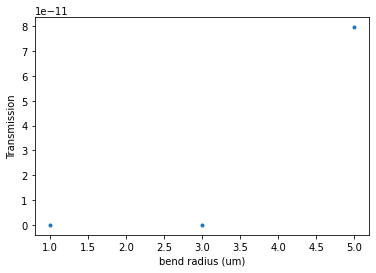

In [14]:
import gdsfactory.simulation.gtidy3d as gt
import matplotlib.pyplot as plt

r, integral = gt.modes.sweep_bend_loss()
plt.plot(r, integral, ".")
plt.xlabel("bend radius (um)")
plt.ylabel("Transmission")
plt.show()